In [1]:
from pathlib import Path
import sys
PROJECT_ROOT = Path.cwd().parent
SRC = PROJECT_ROOT / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC))
print("Using SRC:", SRC)


Using SRC: c:\Users\DELL I7\OneDrive\UVG\OCTAVO SEMESTRE\MODELACION Y SIMULACION\PROYECTO_FINAL\muscle_adaptation_project_v3\BORRADORProyectoModSim\src


# 02 — Experimentos (bloques, adherencia, deload)

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1] / "src"))

from sd_model.params import Params
from sd_model.experiments import base_run
from sd_model.seir_muscle import MuscleSEIRModel
from sd_model.interventions import piecewise_constant, deload_effects


In [3]:

# Helper para crear una A(t) personalizada
def custom_A(adherence_val=0.8, intensity_val=1.0, protein_val=1.0):
    return piecewise_constant([(0.0, adherence_val*intensity_val*protein_val)])


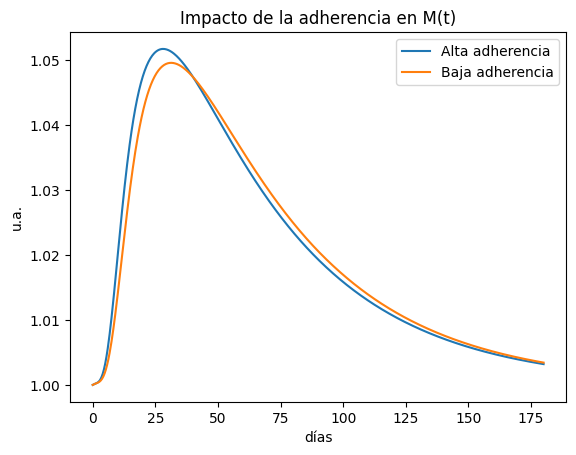

In [4]:

params = Params()

A_hi = custom_A(0.95, 1.2, 1.0)
A_lo = custom_A(0.6, 0.9, 0.9)
g_gamma, g_phi = deload_effects()

m_hi = MuscleSEIRModel(params, A_hi, g_gamma, g_phi).simulate()
m_lo = MuscleSEIRModel(params, A_lo, g_gamma, g_phi).simulate()

plt.figure()
plt.plot(m_hi["t"], m_hi["M"], label="Alta adherencia")
plt.plot(m_lo["t"], m_lo["M"], label="Baja adherencia")
plt.title("Impacto de la adherencia en M(t)")
plt.xlabel("días"); plt.ylabel("u.a.")
plt.legend(); plt.show()


Más experimentos: variar `phi` (microlesión), `gamma`, y bloques de deload.